In [1]:
# Basic classification : Classify images of clothing

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.13.0


In [15]:
# Import the fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
# loading the dataset returns 4 numpy arrays


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
# Explore the data
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

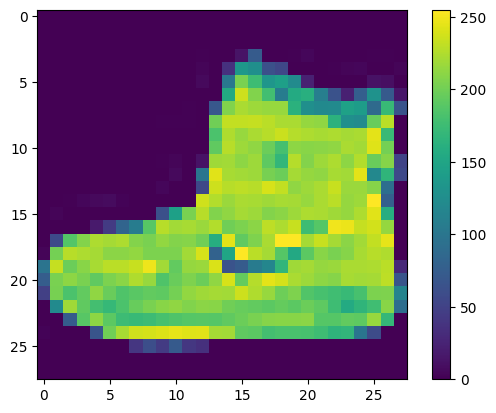

In [11]:
# Preprocess the data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
# Scale the values to a range of 0 to 1 before feeding them to the neural network model
train_images = train_images / 255.0
test_images = test_images / 255.0

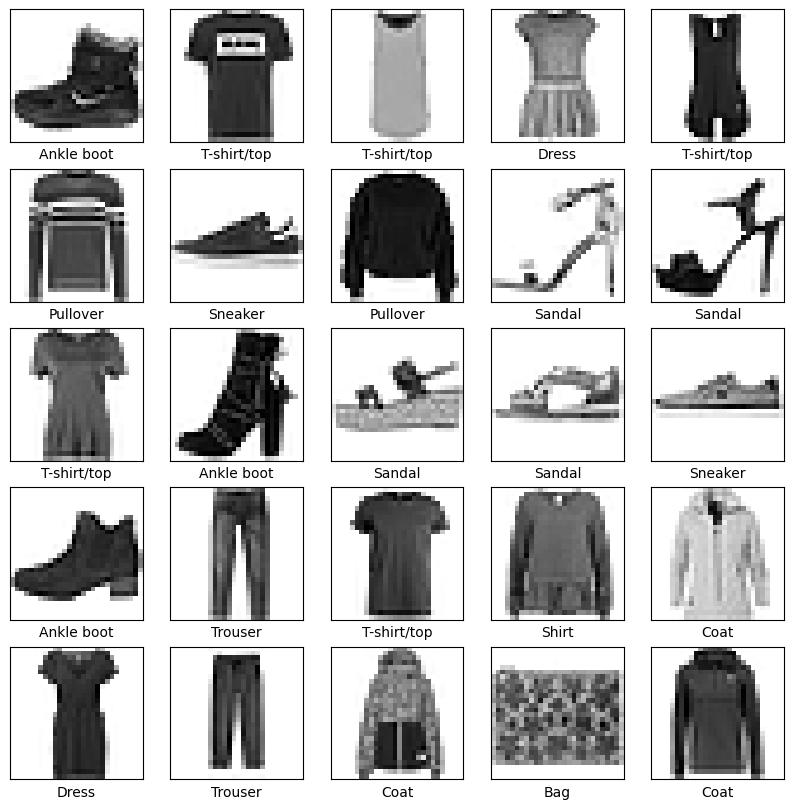

In [17]:
# Verify the data is in the correct format
# Let's diplay the first 25 images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [18]:
# Build the model
# Setup the layers

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [19]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
# Train the model
# Training the NN model requires the following steps:
# 1. Feed the training data to the model
# 2. The model learns to associate images and labels
# 3. Ask the model to make predictions about a test set
# 4. Verify that the predictions match the labels from the test_labels

In [21]:
# Feed the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4997 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3769 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3389 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3130 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2943 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2808 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2670 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2562 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2480 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.23

In [22]:
# Evaluate the accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest Accuracy:', test_acc)

313/313 - 1s - loss: 0.3325 - accuracy: 0.8824 - 542ms/epoch - 2ms/step

Test Accuracy: 0.8823999762535095


In [23]:
# Make predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [24]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [25]:
predictions[0]

array([2.58516650e-07, 6.48603870e-12, 1.44777690e-09, 1.44058888e-11,
       6.22499741e-09, 3.13937693e-04, 1.08850875e-08, 5.25059504e-03,
       1.69530541e-08, 9.94435191e-01], dtype=float32)

In [26]:
# A prediction is an array of 10 numbers.
# They represent the model's confidence that the image corresponds to each of the 10 different atricles of clothing

In [27]:
np.argmax(predictions[0])

9

In [28]:
# So the model is confident that this image is class_names[9] which is an ankle boot image

In [29]:
# Define functions to graph the full set of 10 class predictions

In [30]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

In [31]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

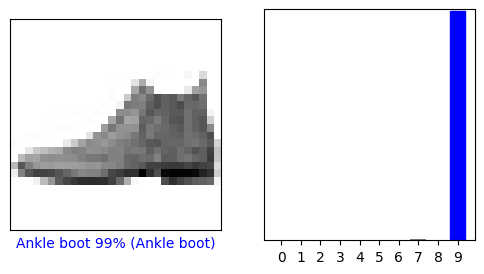

In [32]:
# Verify predictions
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

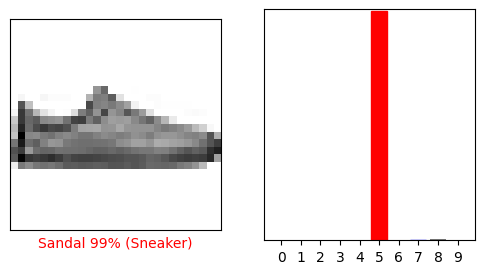

In [33]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

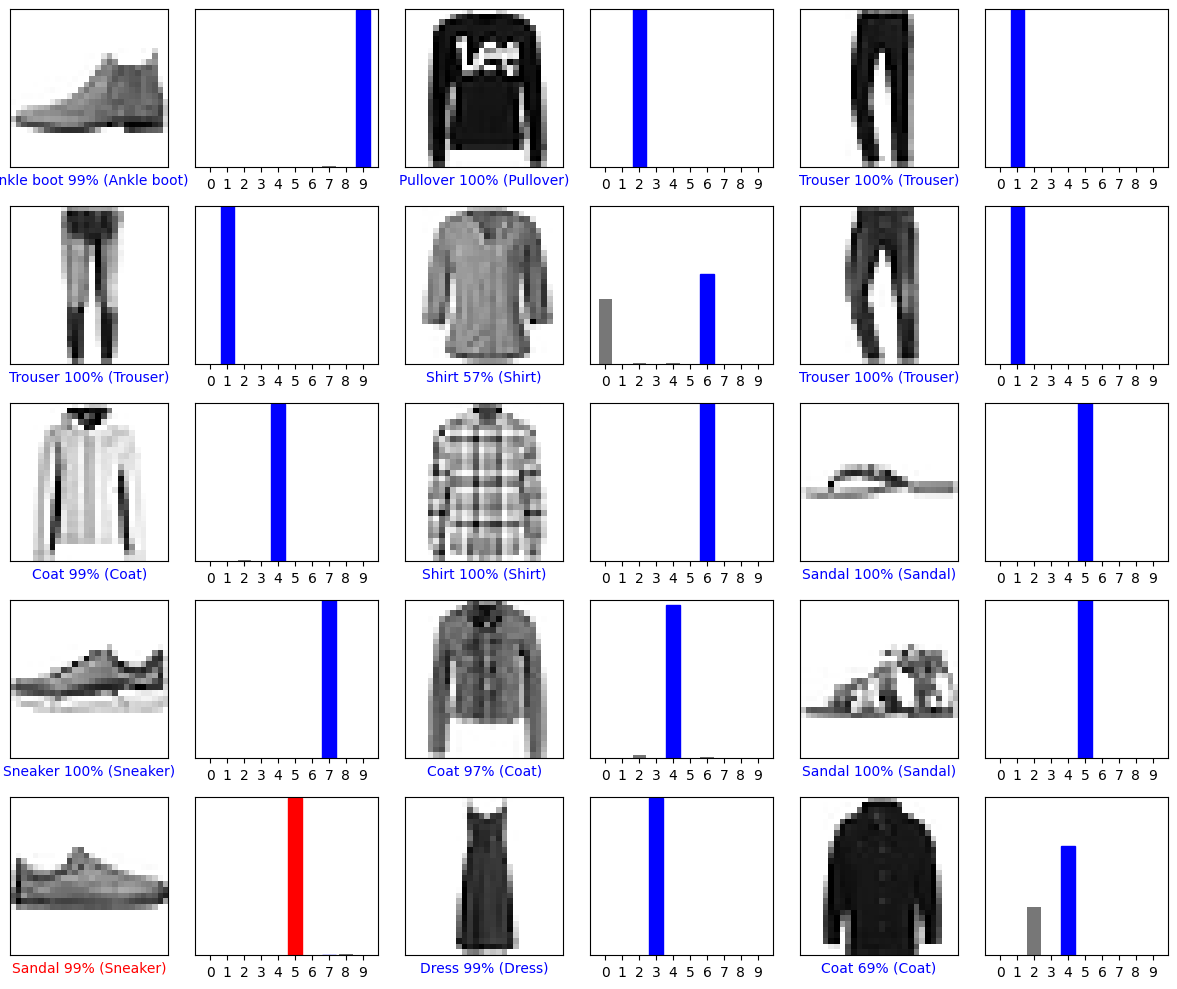

In [34]:
# Let's plot several images with their predictions. Model can be wrong even when very confident
# Plot the first x test images, their predicted labels and true labels
# Color correct predictions in blue and incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [35]:
# Use the trained model

In [37]:
# Grab an image from the test dataset
img = test_images[1]
print(img.shape)

(28, 28)


In [38]:
# Add the image to a batch where it's the only member
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [39]:
# Now predict the correct label for this image

In [40]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 54ms/step
[[2.3534987e-05 1.7022492e-16 9.9848193e-01 2.0119220e-14 1.4711296e-03
  4.0625077e-09 2.3501858e-05 2.6404508e-12 7.6328683e-12 1.6118338e-18]]


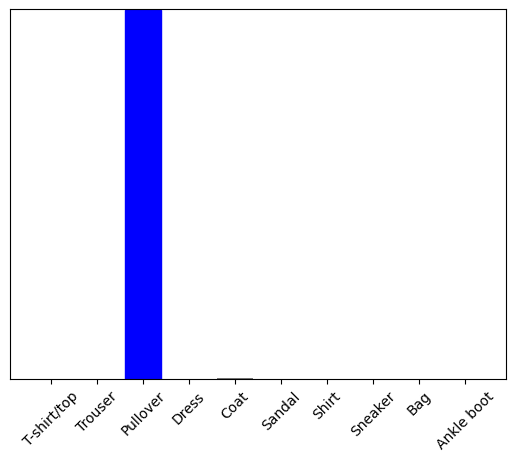

In [41]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [42]:
#tf.keras.Model redict returns a list of lists , one list for each image in the batch of data.

In [43]:
np.argmax(predictions_single[0])

2

In [ ]:
# Congrats!!! your model is learnt